# Import libraries, load a trip summary file and filter driver -1's data

In [1]:
from __future__ import division
#
from _setting import ts_dir
from charts import two_pie_chart, one_bar_chart
#
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline  
# %gui wx
#
df_whole = pd.read_csv('%s/%s'%(ts_dir, 'whole-trip-summary.csv'))
# Filter data whose driver-id is -1
df_whole = df_whole[(df_whole['driver-id'] != -1)]

**Trip summary file format which does not included opportunity cost.**

In [2]:
print df_whole[:5]
print df_whole[-5:]

   yy  mm  dd  driver-id  trip-mode  trip-mode-num  fare-sum    fare-mean  \
2   9   1   1          1          3              9     12329  1369.888889   
3   9   1   1          2          3              7      4730   675.714286   
4   9   1   1          7          3             16     20859  1303.687500   
5   9   1   1          8          3             17     14977   881.000000   
6   9   1   1         10          3             27     31497  1166.555556   

     fare-std  
2  469.555759  
3  214.620374  
4  814.055831  
5  405.759011  
6  637.574209  
          yy  mm  dd  driver-id  trip-mode  trip-mode-num  fare-sum  \
23171164  10  12  31      59922          3             19     22659   
23171165  10  12  31      59945          1              1      1395   
23171166  10  12  31      59945          3              7      9555   
23171167  10  12  31      59948          3             22     23320   
23171168  10  12  31      59954          3              2      2165   

            fa

# The number of trip for each trip mode

In [3]:
df_2009, df_2010 = df_whole[(df_whole['yy'] == 9)], df_whole[(df_whole['yy'] == 10)]
groupbed_2009, groupbed_2010 = df_2009.groupby(['trip-mode']), df_2010.groupby(['trip-mode'])
ytn_2009 = groupbed_2009.sum()['trip-mode-num'].to_frame('num. Y2009')
yearly_trip_num = ytn_2009.copy(deep=True)
per_2009 = ytn_2009/ytn_2009.sum()
yearly_trip_num['per. Y2009'] = per_2009
ytn_2010 = groupbed_2010.sum()['trip-mode-num'].to_frame('num. Y2010')
yearly_trip_num = yearly_trip_num.join(ytn_2010, how='inner')
per_2010 = ytn_2010/ytn_2010.sum()
yearly_trip_num['per. Y2010'] = per_2010
# yearly_trip_num = yearly_trip_num.join(per_2010, how='inner')

- drop off InAP - pick up InAP             -> 0
- drop off InAP - pick up OutAP            -> 1
- drop off OutAP - pick up InAP            -> 2
- drop off OutAP - pick up OutAP           -> 3

In [4]:
print yearly_trip_num

           num. Y2009  per. Y2009  num. Y2010  per. Y2010
trip-mode                                                
0              832696    0.006437     1206119    0.008893
1             2520223    0.019481     2729302    0.020125
2             1312643    0.010147     1434957    0.010581
3           124703092    0.963936   130250352    0.960401


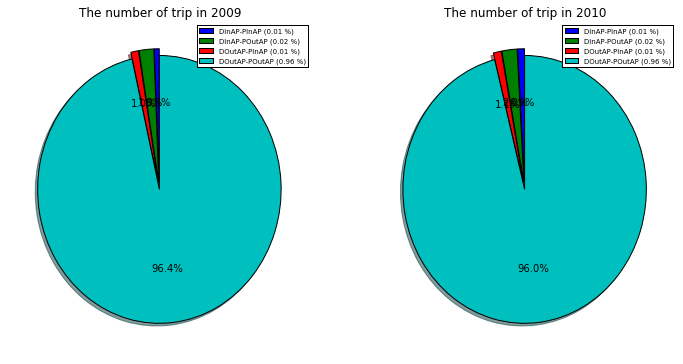

The total number of trips: 129,368,654(2009), 135,620,730(2010)

           num. Y2009  per. Y2009  num. Y2010  per. Y2010  num. Y2010-Y2009  \
trip-mode                                                                     
0              832696    0.006437     1206119    0.008893            373423   
1             2520223    0.019481     2729302    0.020125            209079   
2             1312643    0.010147     1434957    0.010581            122314   
3           124703092    0.963936   130250352    0.960401           5547260   

           per. Y2010-Y2009  
trip-mode                    
0                  0.002457  
1                  0.000644  
2                  0.000434  
3                 -0.003534  


In [5]:
labels = ['DInAP-PInAP', 'DInAP-POutAP', 'DOutAP-PInAP', 'DOutAP-POutAP']
two_pie_chart(labels, 'The number of trip in 2009', yearly_trip_num['per. Y2009'], 'The number of trip in 2010', yearly_trip_num['per. Y2010'])
yearly_trip_num['num. Y2010-Y2009'] = yearly_trip_num['num. Y2010'] - yearly_trip_num['num. Y2009']
yearly_trip_num['per. Y2010-Y2009'] = yearly_trip_num['per. Y2010'] - yearly_trip_num['per. Y2009']
print 'The total number of trips: %s(2009), %s(2010)' %(format(yearly_trip_num['num. Y2009'].sum(), ",d"), format(yearly_trip_num['num. Y2010'].sum(), ",d"))
print ''
print yearly_trip_num

- Sum of trip-mode 0,1 and 2's percentage is around 0.003535 (0.3%) which is same as the proportion of trip 3
- Is it can show the impact of information boards?
    - Did people really use the information properly?

# Fare for drivers

## Average daily fare for drivers (total)

In [6]:
groupbed_2009, groupbed_2010 = df_2009.groupby(['yy','mm','dd','driver-id']), df_2010.groupby(['yy','mm','dd', 'driver-id'])
driver_daily_fare_2009=groupbed_2009.sum()['fare-sum'].to_frame('daily-fare').reset_index().groupby('driver-id')
driver_daily_fare_2010=groupbed_2010.sum()['fare-sum'].to_frame('daily-fare').reset_index().groupby('driver-id')

In [7]:
avg_fare_2009 = driver_daily_fare_2009.mean()['daily-fare'].to_frame('avg-daily-fare-Y2009').mean()
avg_fare_2010 = driver_daily_fare_2010.mean()['daily-fare'].to_frame('avg-daily-fare-Y2010').mean()

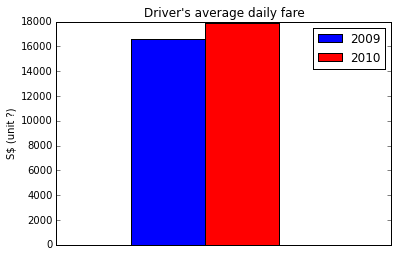

        2009: S$16,627   2010: S$17,881


In [8]:
one_bar_chart("Driver's average daily fare", 'S$ (unit ?)', [], [float(avg_fare_2009)], [float(avg_fare_2010)], ['2009', '2010'])
print '        2009: S$%s   2010: S$%s' %(format(int(avg_fare_2009), ",d"),format(int(avg_fare_2010), ",d"))

- Total fare in 2010 is greater than that of in 2009

## Average daily fare for drivers (for each trip mode)

In [9]:
groupbed_2009 = df_2009.groupby(['driver-id','trip-mode'])
groupbed_2010 = df_2010.groupby(['driver-id','trip-mode'])
driver_daily_fare_2009 = groupbed_2009.mean()['fare-sum'].to_frame('avg-daily-fare').reset_index()
driver_daily_fare_2010 = groupbed_2010.mean()['fare-sum'].to_frame('avg-daily-fare').reset_index()
tm_avg_2009 = driver_daily_fare_2009.groupby(['trip-mode']).mean()['avg-daily-fare']
tm_avg_2010 = driver_daily_fare_2010.groupby(['trip-mode']).mean()['avg-daily-fare']

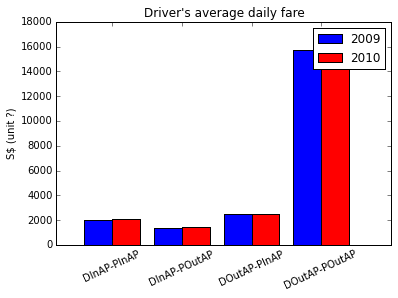

Y2009:  [1994.2374590146144, 1349.2344206279429, 2479.1697422723178, 15736.606017407979]
Y2010:  [2097.3207018310923, 1427.6159141305086, 2516.7052750331754, 16837.648801571599]
Y2010-Y2009: [103.08324281647788, 78.381493502565718, 37.535532760857677, 1101.0427841636192]


In [10]:
one_bar_chart("Driver's average daily fare", 'S$ (unit ?)', 
              ['DInAP-PInAP', 'DInAP-POutAP', 'DOutAP-PInAP', 'DOutAP-POutAP'], 
              tm_avg_2009, tm_avg_2010, ['2009', '2010'])
print 'Y2009: ', list(tm_avg_2009)
print 'Y2010: ', list(tm_avg_2010)
print 'Y2010-Y2009:', list(tm_avg_2010- tm_avg_2009)

- Because 2010's total fare is greater than 2009, the all differences are positive

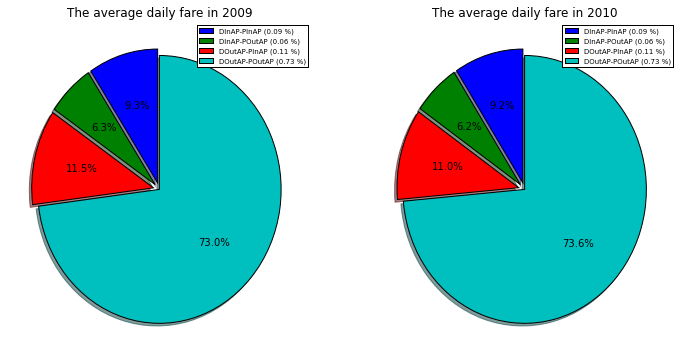

In [11]:
labels = ['DInAP-PInAP', 'DInAP-POutAP', 'DOutAP-PInAP', 'DOutAP-POutAP']
data_2009 = list(tm_avg_2009/tm_avg_2009.sum())
data_2010 = list(tm_avg_2010/tm_avg_2010.sum())
two_pie_chart(labels, 'The average daily fare in 2009', data_2009, 'The average daily fare in 2010', data_2010)

drop off InAP - pick up InAP -> **decrease 0.1%**

drop off InAP - pick up OutAP -> **decrease 0.1%**

drop off OutAP - pick up InAP -> **decrease 0.5%**

drop off OutAP - pick up OutAP -> **increase 0.6%**


# Average fare for trip modes

In [12]:
df_whole['fare/trip'] = df_whole['fare-sum'] / df_whole['trip-mode-num']
print df_whole.groupby(['trip-mode']).mean()['fare/trip']

trip-mode
0    2006.464199
1    1150.827171
2    2162.921881
3    1077.500704
Name: fare/trip, dtype: float64


** Trips departing from the airport return higher fares than the others **

I check that their travel duration is mostly longer than the trips which start out of the airport